In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./dataset/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

In [6]:
df.duplicated().sum()

0

There are no duplicates 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


min of math score is 0 but for the rest is having much higher min (reading=17,writing=10)

In [10]:
print("Categories in 'Gender' feature: ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' feature: ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' feature: ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'test preparation course' feature: ",end=" ")
print(df["test preparation course"].unique())

Categories in 'Gender' feature:  ['female' 'male']
Categories in 'race/ethnicity' feature:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' feature:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test preparation course' feature:  ['none' 'completed']


printing the unique values of each categorical feature

In [11]:
numericalFeatures = [feature for feature in df.columns if df[feature].dtype != "O"]
categoricalFeatures = [feature for feature in df.columns if df[feature].dtype == "O"]

print("we have {0}, numerical features : {1}".format(len(numericalFeatures),numericalFeatures))
print("we have {0}, categorical features : {1}".format(len(categoricalFeatures),categoricalFeatures))


we have 3, numerical features : ['math score', 'reading score', 'writing score']
we have 5, categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"]/len(numericalFeatures)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
readingFull = df[df["reading score"] == 100]["average"].count()
writingFull = df[df["writing score"] == 100]["average"].count()
mathFull = df[df["math score"] == 100]["average"].count()



print(f"Number of students with full marks in reading: {readingFull}")
print(f"Number of students with full marks in writing: {writingFull}")
print(f"Number of students with full marks in math: {mathFull}")


Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [14]:
readingFull = df[df["reading score"] <= 20]["average"].count()
writingFull = df[df["writing score"] <= 20]["average"].count()
mathFull = df[df["math score"] <= 20]["average"].count()



print(f"Number of students with 20 or less marks in reading: {readingFull}")
print(f"Number of students with 20 or less marks in writing: {writingFull}")
print(f"Number of students with 20 or less marks in math: {mathFull}")

Number of students with 20 or less marks in reading: 1
Number of students with 20 or less marks in writing: 3
Number of students with 20 or less marks in math: 4


<Axes: xlabel='average', ylabel='Count'>

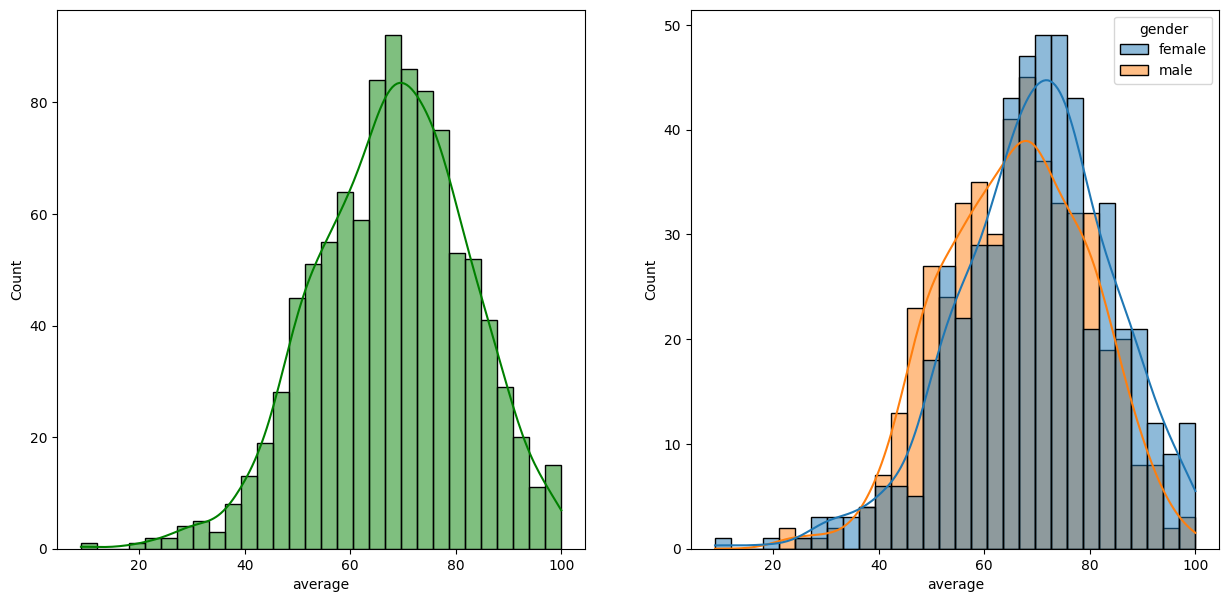

In [34]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="gender")

<Axes: xlabel='total score', ylabel='Count'>

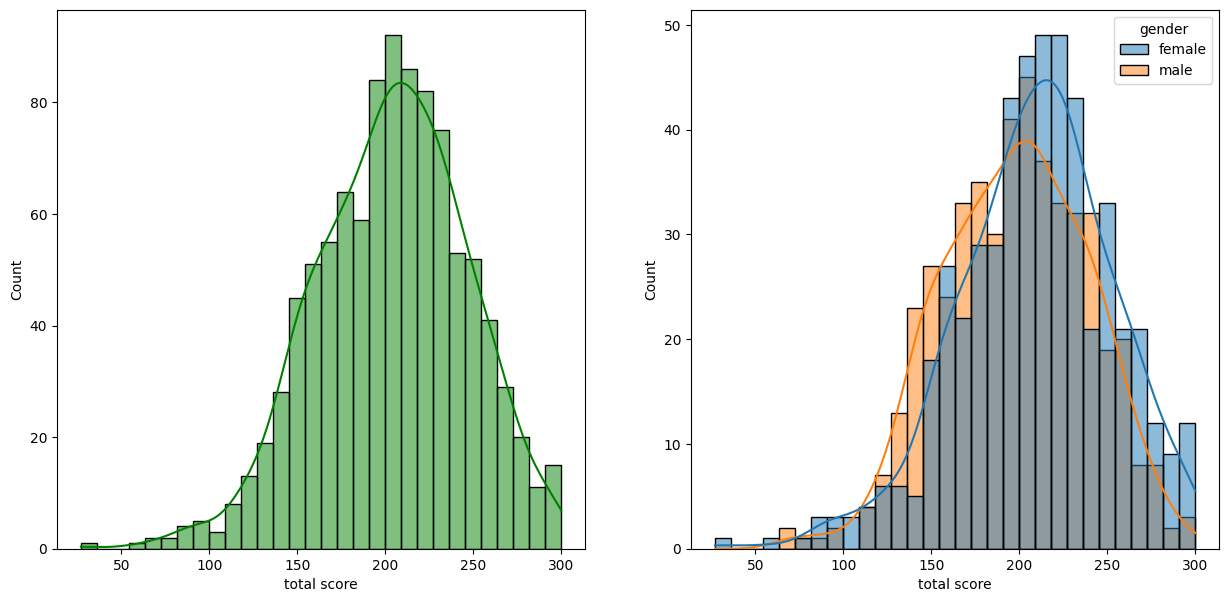

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,7)) #figsize is global
plt.subplot(121)
sns.histplot(data=df,x="total score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="total score",bins=30,kde=True,hue="gender")

<Axes: xlabel='average', ylabel='Count'>

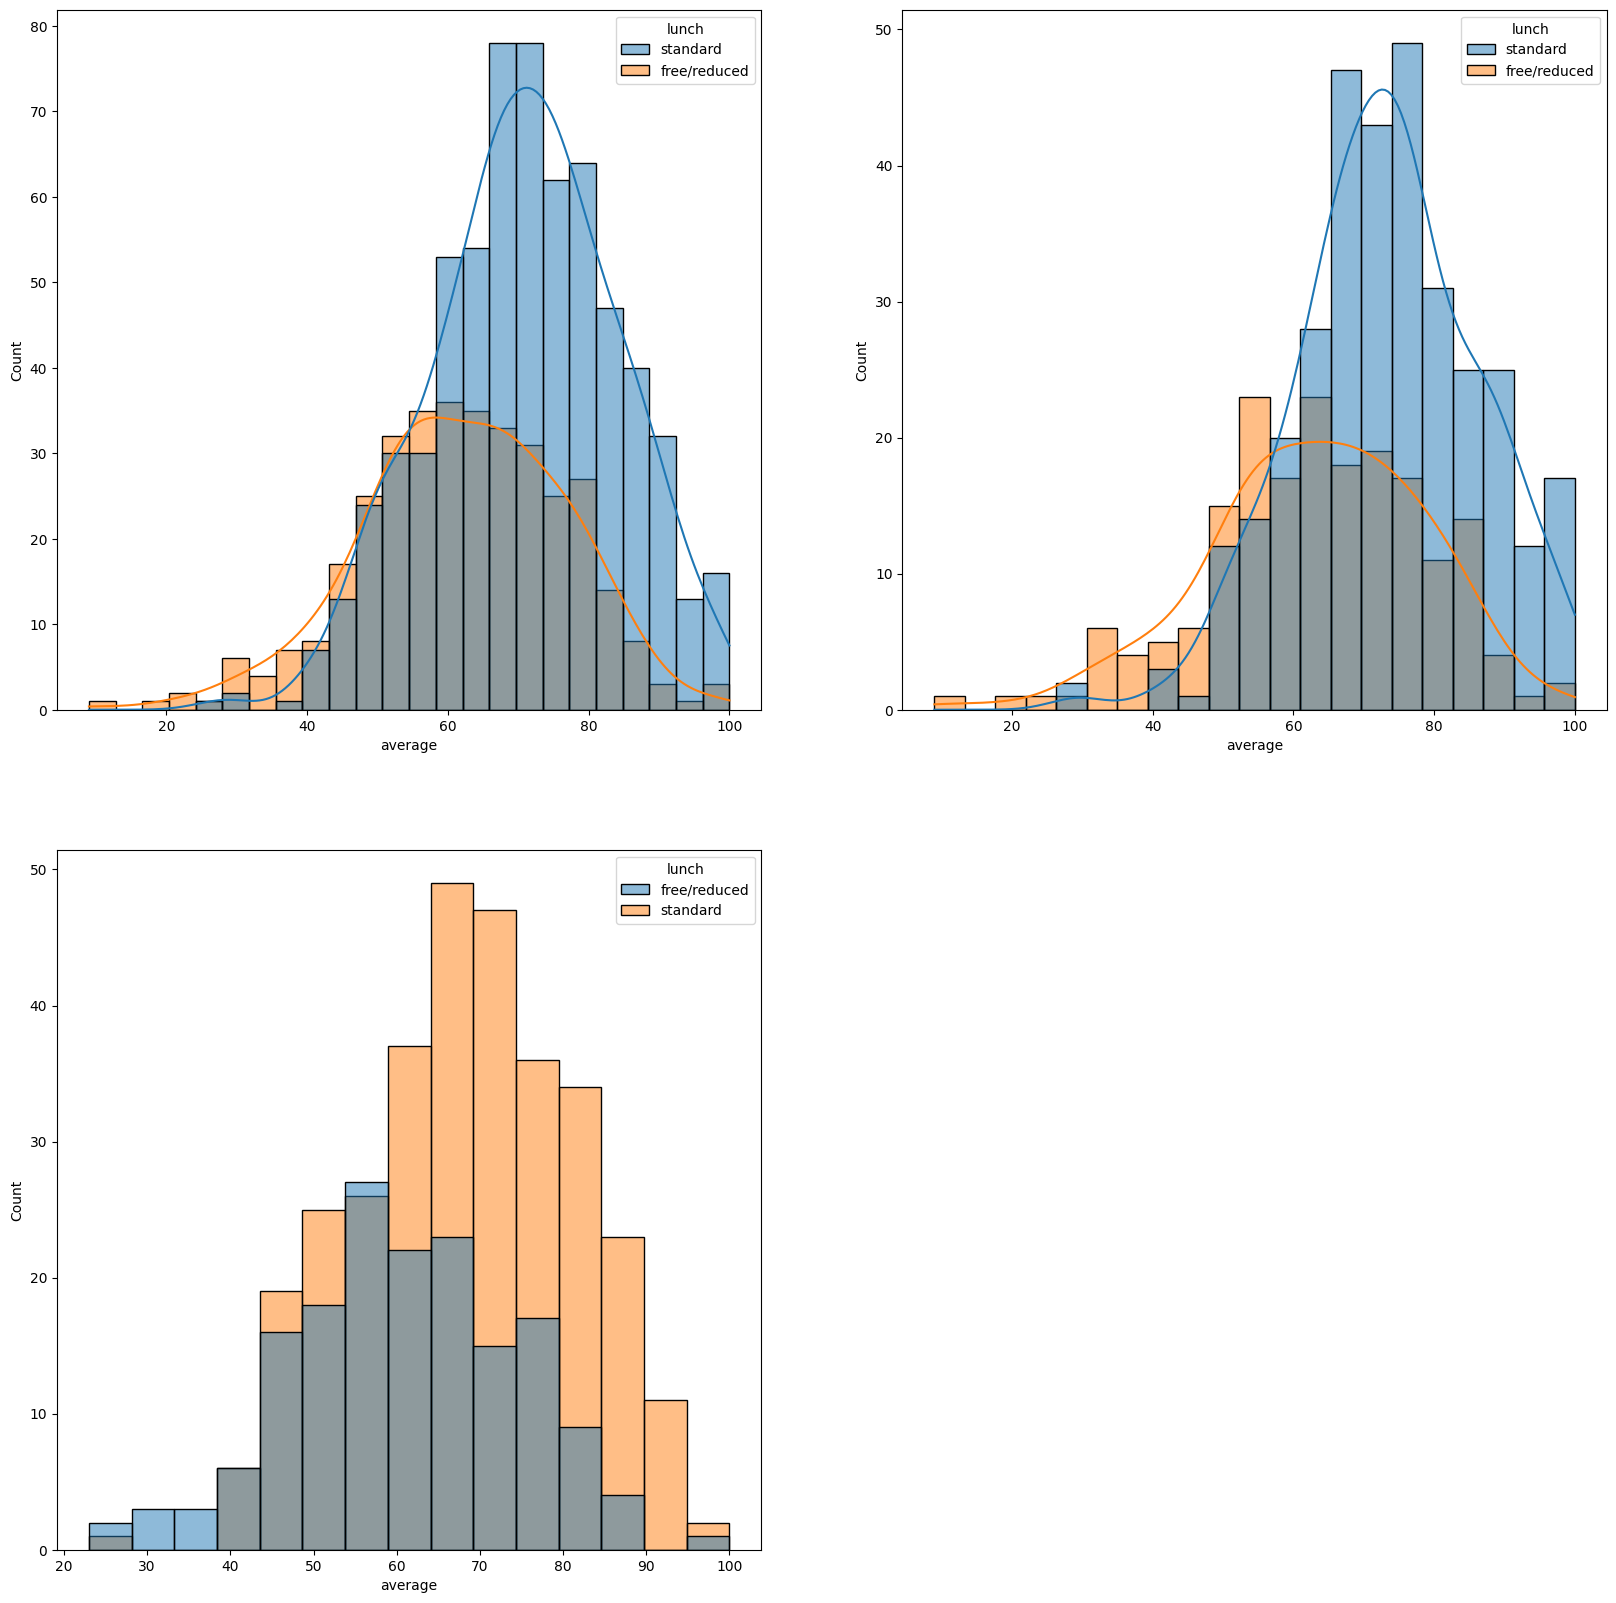

In [49]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.histplot(data=df,x="average",kde=True,hue="lunch")
plt.subplot(222)
sns.histplot(data=df[df.gender == "female"],x="average",kde=True,hue="lunch")
plt.subplot(223)
sns.histplot(data=df[df.gender == "male"],x="average",hue="lunch")

lunch helps getting better grdes

<Axes: xlabel='lunch', ylabel='math score'>

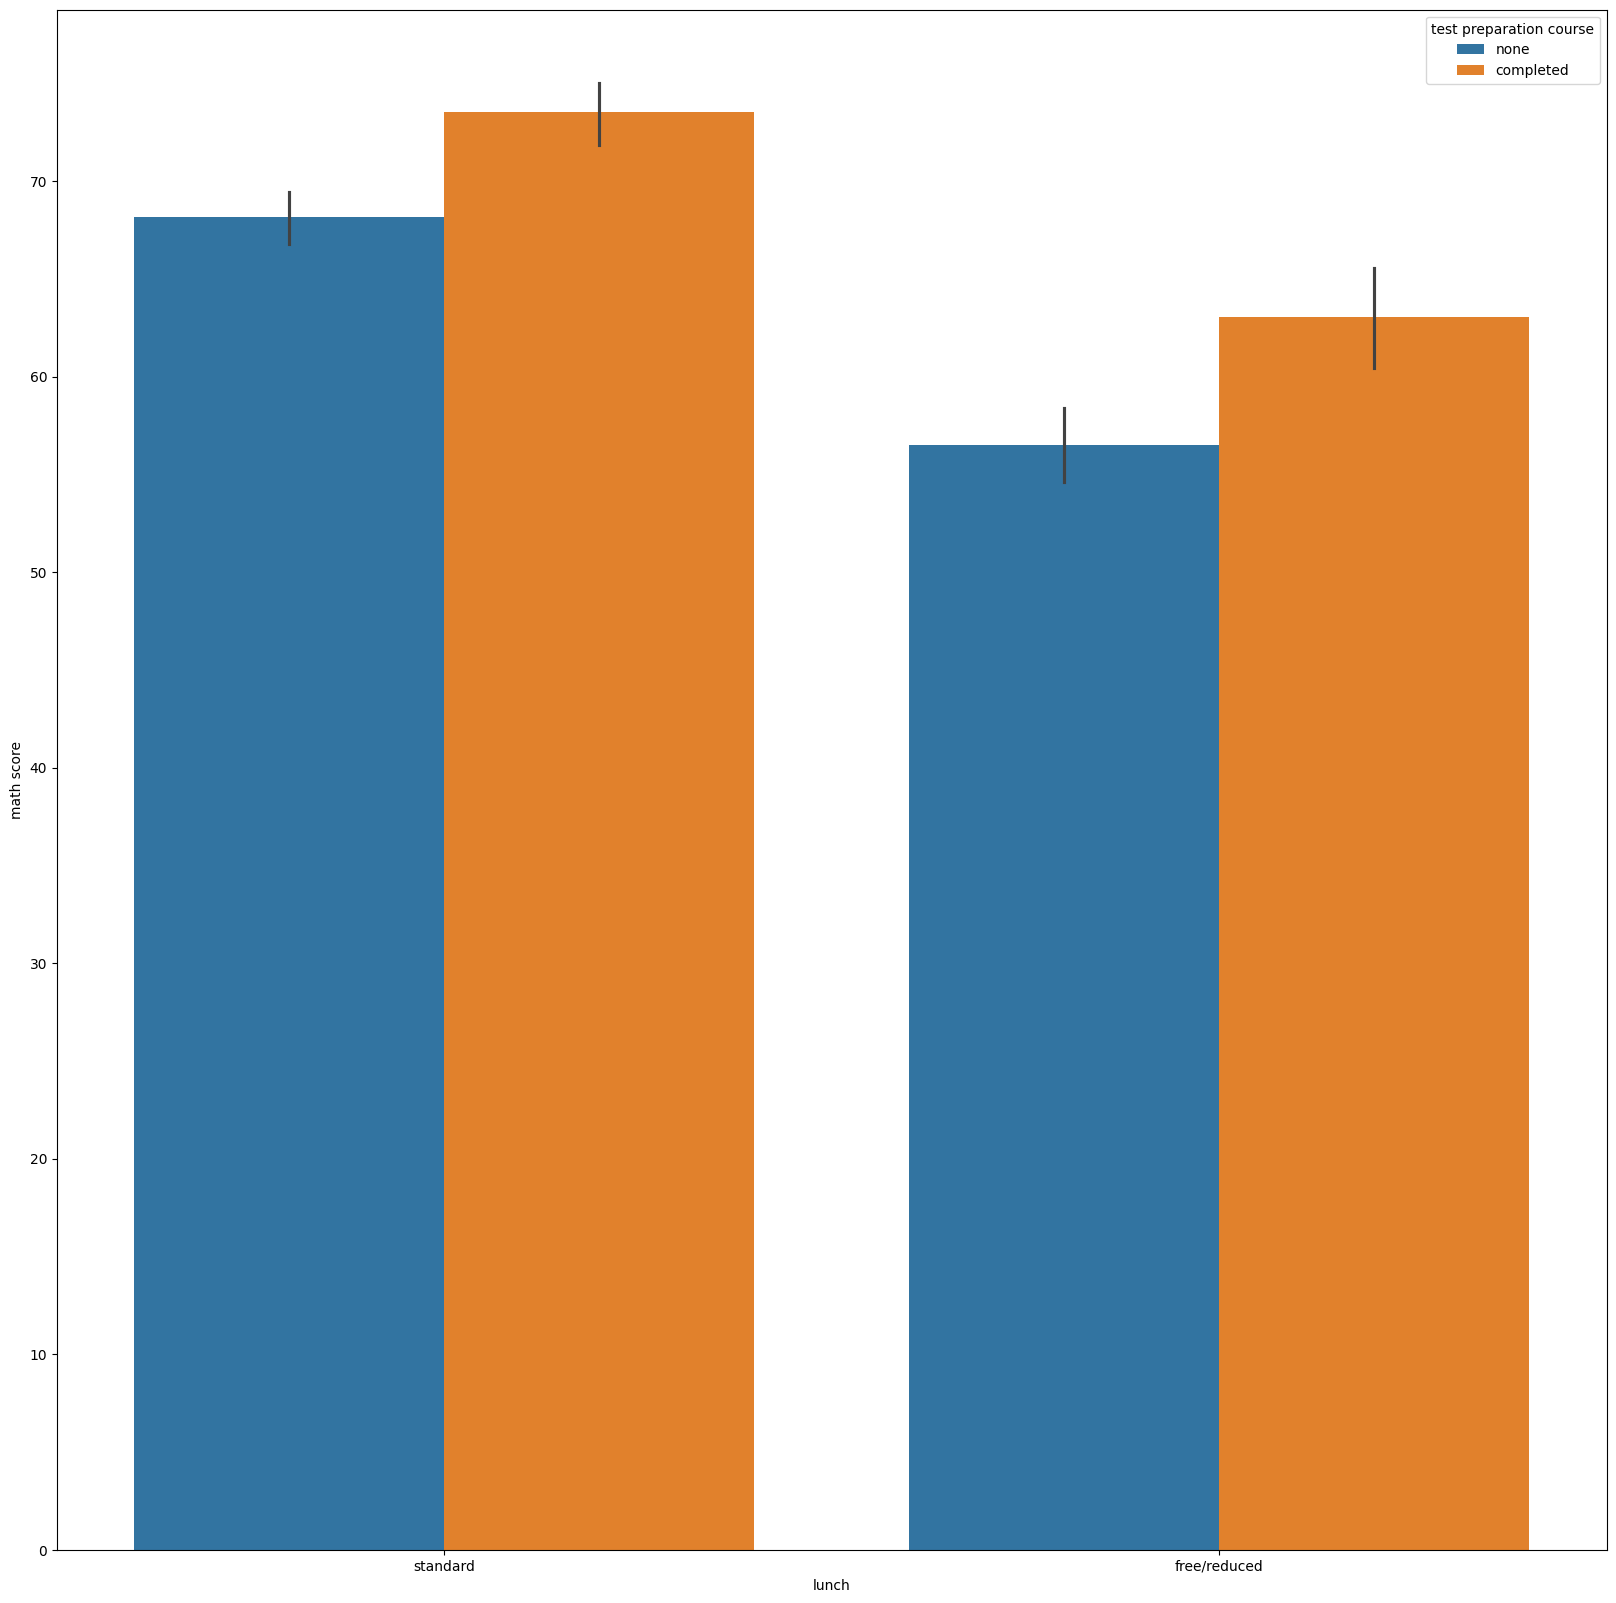

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(111)
sns.barplot(x=df["lunch"],y=df["math score"],hue=df["test preparation course"]) #mean math score
